In [ ]:
import pandas as pd
import tweepy
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import scipy
import matplotlib.pyplot as plt
import matplotlib
import statistics as st
import statsmodels.api  as sm
from sklearn import svm
from google.colab import files
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

In [ ]:
api_key = "eaLFxqln7SellQfGri9cccKla"
api_key_secret = "3p0BmQMeoDtbfEqvrcKEvDhiACHYi865Z17y7aVprVssjqOBCE"
access_token = "1578359033920032768-gKXvw97loCpJBz5lfz1lDKlcbUOJAK"
access_token_secret = "9CJ8MiX4i4LlwRgwrDMKbBZlXVhANSHGJ35dAdB13R3L2"

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
api.wait_on_rate_limit= True
api.wait_on_rate_limit_notify= True

In [ ]:
tweets = pd.read_csv('https://raw.githubusercontent.com/SanketAgwl/Exo-sir-btp/main/NewsFakeCOVID-19_tweets.csv', error_bad_lines=False)
replies= pd.read_csv('https://raw.githubusercontent.com/SanketAgwl/Exo-sir-btp/main/NewsFakeCOVID-19_tweets_replies.csv', error_bad_lines=False)
tweets

,Unnamed: 0,index,tweet_id
0,0,55,1255263076087185413
1,1,55,1254390256461365248
2,5,55,1251163393790099457
3,9,55,1250166483570905088
4,10,55,1250153305524834309
...,...,...,...
5503,9210,561,1223637455783460865
5504,9211,561,1223636954316705792
5505,9212,561,1223636583191986177
5506,9213,561,1223636357618204672


In [ ]:
# for index, row in tweets.iterrows():
#   try:
#     tweet = api.get_status(row['tweet_id'])
#   except:
#     tweets.drop(index, inplace=True)
# tweets.to_csv('output.csv', encoding = 'utf-8-sig')
# files.download('output.csv')
# tweets

In [ ]:
# for index, row in replies.iterrows():
#   try:
#     tweet = api.get_status(row['reply_id'])
#     print(index)
#   except:
#     replies.drop(index, inplace=True)
# replies.to_csv('output2.csv', encoding = 'utf-8-sig')
# files.download('output2.csv')
# replies

In [ ]:
replies= replies.groupby(['news_id', 'tweet_id'], as_index=False)['reply_id'].agg(list)
replies

,news_id,tweet_id,reply_id
0,17,1255484783884369921,"[1254913226325872642, 1255484999203258370]"
1,26,1247680031423254529,[1247689195486720000]
2,26,1249534887691984897,"[1249540796308762626, 1249555510103289858, 124..."
3,38,1249754108107485189,"[1249756159428431872, 1249758816582938629, 124..."
4,38,1249755471080239106,"[1249803365095215106, 1249756261920333824, 124..."
...,...,...,...
976,606,1253614644725497856,[1253614646130610177]
977,606,1255269152534736896,[1209865033078980610]
978,606,1255520293961060354,"[1255528968138231808, 1255523492092665860, 125..."
979,610,1229077661038735360,[1229078088169947137]


In [ ]:
tweets=pd.merge(replies,tweets['tweet_id'])
tweets

,news_id,tweet_id,reply_id
0,17,1255484783884369921,"[1254913226325872642, 1255484999203258370]"
1,26,1247680031423254529,[1247689195486720000]
2,26,1249534887691984897,"[1249540796308762626, 1249555510103289858, 124..."
3,38,1249754108107485189,"[1249756159428431872, 1249758816582938629, 124..."
4,38,1249766660916932614,"[1249768261161562112, 1249768226730450945]"
...,...,...,...
673,606,1251586150550122498,[1252361247661543424]
674,606,1253614644725497856,[1253614646130610177]
675,606,1255520293961060354,"[1255528968138231808, 1255523492092665860, 125..."
676,610,1229077661038735360,[1229078088169947137]


In [ ]:
event= tweets[tweets.news_id==466]
event

,news_id,tweet_id,reply_id
355,466,1235250611177877506,[1235253684998737920]
356,466,1235591457202823168,[1235591458528399360]
357,466,1235855117418516483,[1235856688403472389]
358,466,1236863560262639616,"[1236818671994982400, 1236863909681717248]"
359,466,1237471214005870593,[1237473007725154306]
360,466,1238099015838896133,[1238099735103385601]
361,466,1238503531943878656,[1238516323056943104]
362,466,1238847279299092482,"[1238161439585533952, 1239010307340566528, 123..."
363,466,1239280486280597505,"[1239266166029324288, 1239284075816353793, 123..."
364,466,1239382049217073152,"[1239412744832466944, 1239417142920933377, 123..."


In [ ]:
spread = pd.DataFrame(columns=["date", "ix","ie","r","rx","re"])
spread

,date,ix,ie,r,rx,re


In [ ]:
event['tweet_detail'] = pd.NA
for index, row in event.iterrows():
     id= row['tweet_id']
     try:
        tweet = api.get_status(row['tweet_id'])
        time= tweet.created_at.date()
        userid= tweet.user.id
        event.at[index, 'tweet_detail']= [time, id, userid]
     except:
        event.drop(index, inplace=True)
event.sort_values(['tweet_detail'])

,news_id,tweet_id,reply_id,tweet_detail
355,466,1235250611177877506,[1235253684998737920],"[2020-03-04, 1235250611177877506, 435122403]"
356,466,1235591457202823168,[1235591458528399360],"[2020-03-05, 1235591457202823168, 776122588833..."
357,466,1235855117418516483,[1235856688403472389],"[2020-03-06, 1235855117418516483, 859836939201..."
358,466,1236863560262639616,"[1236818671994982400, 1236863909681717248]","[2020-03-09, 1236863560262639616, 802396682235..."
359,466,1237471214005870593,[1237473007725154306],"[2020-03-10, 1237471214005870593, 101239723625..."
360,466,1238099015838896133,[1238099735103385601],"[2020-03-12, 1238099015838896133, 102428301]"
361,466,1238503531943878656,[1238516323056943104],"[2020-03-13, 1238503531943878656, 838495559858..."
362,466,1238847279299092482,"[1238161439585533952, 1239010307340566528, 123...","[2020-03-14, 1238847279299092482, 19077023]"
363,466,1239280486280597505,"[1239266166029324288, 1239284075816353793, 123...","[2020-03-15, 1239280486280597505, 838495559858..."
364,466,1239382049217073152,"[1239412744832466944, 1239417142920933377, 123...","[2020-03-16, 1239382049217073152, 125924860]"


In [ ]:
event['replies_detail'] = pd.NA
for index, row in event.iterrows():
  reply_detail= []
  for id in row['reply_id']:
    print(id)
    try:
      tweet = api.get_status(id)
      time= tweet.created_at.date()
      userid= tweet.user.id
      reply_detail.append([time, id, userid])
    except:
        pass
  reply_detail.sort()
  event.at[index, 'replies_detail']= reply_detail

1235253684998737920
1235591458528399360
1235856688403472389
1236818671994982400
1236863909681717248
1237473007725154306
1238099735103385601
1238516323056943104
1238161439585533952
1239010307340566528
1239605058045526025
1239605660033007618
1240750623882018816
1238854215583158278
1239266166029324288
1239284075816353793
1239284659311108097
1239363847242342400
1239412744832466944
1239417142920933377
1239417760758632449
1239383104621441024
1239383786501967872
1240262179829489665
1240294545952247810
1242984757744431105
1242985559997497347
1242991067009634305
1242993071844777984
1242993777473662977
1242995504276881408
1242996537833242630
1243006576983781377
1243036640857161733
1244312344605396993
1244316959182905344
1244302058741776390
1245390880187404289
1247502394134368262
1247137221167153153
1247137346505637890
1242995504276881408
1242996537833242630
1243006576983781377
1243036640857161733
1243047569166675969
1251511002190901249
1256092046215053312


In [ ]:
event

,news_id,tweet_id,reply_id,tweet_detail,replies_detail
355,466,1235250611177877506,[1235253684998737920],"[2020-03-04, 1235250611177877506, 435122403]","[[2020-03-04, 1235253684998737920, 435122403]]"
356,466,1235591457202823168,[1235591458528399360],"[2020-03-05, 1235591457202823168, 776122588833...","[[2020-03-05, 1235591458528399360, 77612258883..."
357,466,1235855117418516483,[1235856688403472389],"[2020-03-06, 1235855117418516483, 859836939201...","[[2020-03-06, 1235856688403472389, 85983693920..."
358,466,1236863560262639616,"[1236818671994982400, 1236863909681717248]","[2020-03-09, 1236863560262639616, 802396682235...","[[2020-03-09, 1236818671994982400, 39453212], ..."
359,466,1237471214005870593,[1237473007725154306],"[2020-03-10, 1237471214005870593, 101239723625...","[[2020-03-10, 1237473007725154306, 10123972362..."
360,466,1238099015838896133,[1238099735103385601],"[2020-03-12, 1238099015838896133, 102428301]","[[2020-03-12, 1238099735103385601, 3042980196]]"
361,466,1238503531943878656,[1238516323056943104],"[2020-03-13, 1238503531943878656, 838495559858...","[[2020-03-13, 1238516323056943104, 83849555985..."
362,466,1238847279299092482,"[1238161439585533952, 1239010307340566528, 123...","[2020-03-14, 1238847279299092482, 19077023]","[[2020-03-12, 1238161439585533952, 19077023], ..."
363,466,1239280486280597505,"[1239266166029324288, 1239284075816353793, 123...","[2020-03-15, 1239280486280597505, 838495559858...","[[2020-03-15, 1239266166029324288, 1383272101]..."
364,466,1239382049217073152,"[1239412744832466944, 1239417142920933377, 123...","[2020-03-16, 1239382049217073152, 125924860]","[[2020-03-16, 1239383104621441024, 11148299648..."


In [ ]:
date_user= {}
event


,news_id,tweet_id,reply_id,tweet_detail,replies_detail
355,466,1235250611177877506,[1235253684998737920],"[2020-03-04, 1235250611177877506, 435122403]","[[2020-03-04, 1235253684998737920, 435122403]]"
356,466,1235591457202823168,[1235591458528399360],"[2020-03-05, 1235591457202823168, 776122588833...","[[2020-03-05, 1235591458528399360, 77612258883..."
357,466,1235855117418516483,[1235856688403472389],"[2020-03-06, 1235855117418516483, 859836939201...","[[2020-03-06, 1235856688403472389, 85983693920..."
358,466,1236863560262639616,"[1236818671994982400, 1236863909681717248]","[2020-03-09, 1236863560262639616, 802396682235...","[[2020-03-09, 1236818671994982400, 39453212], ..."
359,466,1237471214005870593,[1237473007725154306],"[2020-03-10, 1237471214005870593, 101239723625...","[[2020-03-10, 1237473007725154306, 10123972362..."
360,466,1238099015838896133,[1238099735103385601],"[2020-03-12, 1238099015838896133, 102428301]","[[2020-03-12, 1238099735103385601, 3042980196]]"
361,466,1238503531943878656,[1238516323056943104],"[2020-03-13, 1238503531943878656, 838495559858...","[[2020-03-13, 1238516323056943104, 83849555985..."
362,466,1238847279299092482,"[1238161439585533952, 1239010307340566528, 123...","[2020-03-14, 1238847279299092482, 19077023]","[[2020-03-12, 1238161439585533952, 19077023], ..."
363,466,1239280486280597505,"[1239266166029324288, 1239284075816353793, 123...","[2020-03-15, 1239280486280597505, 838495559858...","[[2020-03-15, 1239266166029324288, 1383272101]..."
364,466,1239382049217073152,"[1239412744832466944, 1239417142920933377, 123...","[2020-03-16, 1239382049217073152, 125924860]","[[2020-03-16, 1239383104621441024, 11148299648..."


In [ ]:
event.to_csv('event.csv', encoding = 'utf-8-sig')
files.download('event.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
event.sort_values(by='tweet_detail', inplace=True)
event

,news_id,tweet_id,reply_id,tweet_detail,replies_detail
355,466,1235250611177877506,[1235253684998737920],"[2020-03-04, 1235250611177877506, 435122403]","[[2020-03-04, 1235253684998737920, 435122403]]"
356,466,1235591457202823168,[1235591458528399360],"[2020-03-05, 1235591457202823168, 776122588833...","[[2020-03-05, 1235591458528399360, 77612258883..."
357,466,1235855117418516483,[1235856688403472389],"[2020-03-06, 1235855117418516483, 859836939201...","[[2020-03-06, 1235856688403472389, 85983693920..."
358,466,1236863560262639616,"[1236818671994982400, 1236863909681717248]","[2020-03-09, 1236863560262639616, 802396682235...","[[2020-03-09, 1236818671994982400, 39453212], ..."
359,466,1237471214005870593,[1237473007725154306],"[2020-03-10, 1237471214005870593, 101239723625...","[[2020-03-10, 1237473007725154306, 10123972362..."
360,466,1238099015838896133,[1238099735103385601],"[2020-03-12, 1238099015838896133, 102428301]","[[2020-03-12, 1238099735103385601, 3042980196]]"
361,466,1238503531943878656,[1238516323056943104],"[2020-03-13, 1238503531943878656, 838495559858...","[[2020-03-13, 1238516323056943104, 83849555985..."
362,466,1238847279299092482,"[1238161439585533952, 1239010307340566528, 123...","[2020-03-14, 1238847279299092482, 19077023]","[[2020-03-12, 1238161439585533952, 19077023], ..."
363,466,1239280486280597505,"[1239266166029324288, 1239284075816353793, 123...","[2020-03-15, 1239280486280597505, 838495559858...","[[2020-03-15, 1239266166029324288, 1383272101]..."
364,466,1239382049217073152,"[1239412744832466944, 1239417142920933377, 123...","[2020-03-16, 1239382049217073152, 125924860]","[[2020-03-16, 1239383104621441024, 11148299648..."


In [ ]:
# 1 for ie and 0 for ix
date_id={}
for index, row in event.iterrows():
  tweet_list=row['tweet_detail']
  if tweet_list[0] in date_id.keys():
    date_id[tweet_list[0]].append([0,tweet_list[1]])
  else:
    date_id[tweet_list[0]] = [[0,tweet_list[1]]]
  for r2 in row['replies_detail']:
    if(r2[0] in date_id.keys()):
      date_id[r2[0]].append([1,r2[1]])
    else:
      date_id[r2[0]]=[[1,r2[1]]]
date_id


{datetime.date(2020, 3, 4): [[0, 1235250611177877506],
  [1, 1235253684998737920]],
 datetime.date(2020, 3, 5): [[0, 1235591457202823168],
  [1, 1235591458528399360]],
 datetime.date(2020, 3, 6): [[0, 1235855117418516483],
  [1, 1235856688403472389]],
 datetime.date(2020, 3, 9): [[0, 1236863560262639616],
  [1, 1236818671994982400],
  [1, 1236863909681717248]],
 datetime.date(2020, 3, 10): [[0, 1237471214005870593],
  [1, 1237473007725154306]],
 datetime.date(2020, 3, 12): [[0, 1238099015838896133],
  [1, 1238099735103385601],
  [1, 1238161439585533952]],
 datetime.date(2020, 3, 13): [[0, 1238503531943878656],
  [1, 1238516323056943104]],
 datetime.date(2020, 3, 14): [[0, 1238847279299092482],
  [1, 1238854215583158278]],
 datetime.date(2020, 3, 15): [[1, 1239010307340566528],
  [0, 1239280486280597505],
  [1, 1239266166029324288],
  [1, 1239284075816353793],
  [1, 1239284659311108097]],
 datetime.date(2020, 3, 16): [[1, 1239605058045526025],
  [1, 1239605660033007618],
  [1, 123936384

In [ ]:
# for key,value in date_id.items():
#   ix=0
#   ie=0
#   r=0
#   for sub_list in value:
#     sub_list[key][0]==0:ix+1
#     sub_list[key[0]==1:ie+1
#   new_row=[key,ix,ie,r]
#   spread.writerow(new_row)
spread
print(list(date_id.keys())[0])
for date in pd.date_range(start= list(date_id.keys())[0], end= list(date_id.keys())[-1]):
  print(date)
  date= date.date()
  ie= 0
  ix=0
  r= 0
  rx=0
  re=0
  if date in date_id.keys():
    # print(date)
    for sub_list in date_id[date]:
      # print(sub_list[0])
      if sub_list[0]==0: ix+=1
      if sub_list[0]==1: ie+=1
  new_row=[date,ix,ie,r,rx,re]
  # print(new_row)
  # spread.append(pd.DataFrame([new_row], columns=["date", "ix","ie","r"]), ignore_index=True)
  spread.loc[len(spread)] = new_row
spread

2020-03-04
2020-03-04 00:00:00
2020-03-05 00:00:00
2020-03-06 00:00:00
2020-03-07 00:00:00
2020-03-08 00:00:00
2020-03-09 00:00:00
2020-03-10 00:00:00
2020-03-11 00:00:00
2020-03-12 00:00:00
2020-03-13 00:00:00
2020-03-14 00:00:00
2020-03-15 00:00:00
2020-03-16 00:00:00
2020-03-17 00:00:00
2020-03-18 00:00:00
2020-03-19 00:00:00
2020-03-20 00:00:00
2020-03-21 00:00:00
2020-03-22 00:00:00
2020-03-23 00:00:00
2020-03-24 00:00:00
2020-03-25 00:00:00
2020-03-26 00:00:00
2020-03-27 00:00:00
2020-03-28 00:00:00
2020-03-29 00:00:00
2020-03-30 00:00:00
2020-03-31 00:00:00
2020-04-01 00:00:00
2020-04-02 00:00:00
2020-04-03 00:00:00
2020-04-04 00:00:00
2020-04-05 00:00:00
2020-04-06 00:00:00
2020-04-07 00:00:00
2020-04-08 00:00:00
2020-04-09 00:00:00
2020-04-10 00:00:00
2020-04-11 00:00:00
2020-04-12 00:00:00
2020-04-13 00:00:00
2020-04-14 00:00:00
2020-04-15 00:00:00
2020-04-16 00:00:00
2020-04-17 00:00:00
2020-04-18 00:00:00
2020-04-19 00:00:00
2020-04-20 00:00:00
2020-04-21 00:00:00
2020-04-2

,date,ix,ie,r,rx,re
0,2020-03-04,1,1,0,0,0
1,2020-03-05,1,1,0,0,0
2,2020-03-06,1,1,0,0,0
3,2020-03-07,0,0,0,0,0
4,2020-03-08,0,0,0,0,0
5,2020-03-09,1,2,0,0,0
6,2020-03-10,1,1,0,0,0
7,2020-03-11,0,0,0,0,0
8,2020-03-12,1,2,0,0,0
9,2020-03-13,1,1,0,0,0


In [ ]:
spread

,date,ix,ie,r,rx,re
0,2020-03-04,1,1,0,0,0
1,2020-03-05,1,1,0,0,0
2,2020-03-06,1,1,0,0,0
3,2020-03-07,0,0,0,0,0
4,2020-03-08,0,0,0,0,0
5,2020-03-09,1,2,0,0,0
6,2020-03-10,1,1,0,0,0
7,2020-03-11,0,0,0,0,0
8,2020-03-12,1,2,0,0,0
9,2020-03-13,1,1,0,0,0


In [ ]:
# setIds=set()
# date_user={}
# for index, row in event.iterrows():
#     td = row['tweet_detail']
#     if td[0] in date_user.keys():
#       date_user[td[0]].append(td[2])
#       setIds.add(td[2])
#     else:
#       date_user[td[0]]= [td[2]]
#       setIds.add(td[2])
#     rd= row['replies_detail']
#     for r in rd:
#       if r[0] in date_user.keys():
#         # date_user[r[0]].append(r[2)
#         setIds.add(r[2])
#       else:
#         date_user[r[0]]= [r[2]]
#         setIds.add(r[2])
# date_user

In [ ]:
setIds=set()
date_user2={}
for index, row in event.iterrows():
  tweet_list=row['tweet_detail']
  if tweet_list[0] in date_user2.keys():
    date_user2[tweet_list[0]].append([0,tweet_list[1],tweet_list[2]])
    setIds.add(tweet_list[2])
  else:
    date_user2[tweet_list[0]] = [[0,tweet_list[1],tweet_list[2]]]
    setIds.add(tweet_list[2])
  for r2 in row['replies_detail']:
    if(r2[0] in date_user2.keys()):
      date_user2[r2[0]].append([1,r2[1],r2[2]])
      setIds.add(r2[2])
    else:
      date_user2[r2[0]]=[[1,r2[1],r2[2]]]
      setIds.add(r2[2])
date_user2

{datetime.date(2020, 3, 4): [[0, 1235250611177877506, 435122403],
  [1, 1235253684998737920, 435122403]],
 datetime.date(2020, 3, 5): [[0, 1235591457202823168, 776122588833550336],
  [1, 1235591458528399360, 776122588833550336]],
 datetime.date(2020, 3, 6): [[0, 1235855117418516483, 859836939201126406],
  [1, 1235856688403472389, 859836939201126406]],
 datetime.date(2020, 3, 9): [[0, 1236863560262639616, 802396682235170816],
  [1, 1236818671994982400, 39453212],
  [1, 1236863909681717248, 802396682235170816]],
 datetime.date(2020, 3, 10): [[0, 1237471214005870593, 1012397236255444993],
  [1, 1237473007725154306, 1012397236255444993]],
 datetime.date(2020, 3, 12): [[0, 1238099015838896133, 102428301],
  [1, 1238099735103385601, 3042980196],
  [1, 1238161439585533952, 19077023]],
 datetime.date(2020, 3, 13): [[0, 1238503531943878656, 838495559858049024],
  [1, 1238516323056943104, 838495559858049024]],
 datetime.date(2020, 3, 14): [[0, 1238847279299092482, 19077023],
  [1, 12388542155831

In [ ]:
for index, row in spread.iterrows():
  recovered= 0
  recovered_exo=0
  recovered_endo=0
  if index == 0:
    spread.at[index, 'r']= 0
  else:
    prev_date= row['date'] - timedelta(days = 1)
    date= row['date']
    if prev_date in date_user2.keys():
      for ul in date_user2[prev_date]:
        user=ul[2]
        if date not in date_user2.keys() or user not in date_user2[date]:
          recovered+= 1
          if(ul[0]==0):
            recovered_exo+=1
          if(ul[0]==1):
            recovered_endo+=1
    spread.at[index, 'r']= recovered
    spread.at[index, 'rx']=recovered_exo
    spread.at[index, 're']=recovered_endo
spread

,date,ix,ie,r,rx,re
0,2020-03-04,1,1,0,0,0
1,2020-03-05,1,1,2,1,1
2,2020-03-06,1,1,2,1,1
3,2020-03-07,0,0,2,1,1
4,2020-03-08,0,0,0,0,0
5,2020-03-09,1,2,0,0,0
6,2020-03-10,1,1,3,1,2
7,2020-03-11,0,0,2,1,1
8,2020-03-12,1,2,0,0,0
9,2020-03-13,1,1,3,1,2


In [ ]:
spread

,date,ix,ie,r,rx,re
0,2020-03-04,1,1,0,0,0
1,2020-03-05,1,1,2,1,1
2,2020-03-06,1,1,2,1,1
3,2020-03-07,0,0,2,1,1
4,2020-03-08,0,0,0,0,0
5,2020-03-09,1,2,0,0,0
6,2020-03-10,1,1,3,1,2
7,2020-03-11,0,0,2,1,1
8,2020-03-12,1,2,0,0,0
9,2020-03-13,1,1,3,1,2


In [ ]:
spread.rename(columns ={'ix':'Daily exo infected', 'ie':'Daily endo infected','r':'Daily recovered','rx':'Daily exo recovered','re':'Daily endo recovered'},inplace=True)
spread

,date,Daily exo infected,Daily endo infected,Daily recovered,Daily exo recovered,Daily endo recovered
0,2020-03-04,1,1,0,0,0
1,2020-03-05,1,1,2,1,1
2,2020-03-06,1,1,2,1,1
3,2020-03-07,0,0,2,1,1
4,2020-03-08,0,0,0,0,0
5,2020-03-09,1,2,0,0,0
6,2020-03-10,1,1,3,1,2
7,2020-03-11,0,0,2,1,1
8,2020-03-12,1,2,0,0,0
9,2020-03-13,1,1,3,1,2


In [ ]:
# Adding I_X,I_E,i_x,i_e columns to the dataset
# ALL THE VALUES CALCULATED ARE CUMULATIVE
N =len(setIds)
print(N)
spread['I_X']=spread['Daily exo infected'].cumsum()
spread['I_E']=spread['Daily endo infected'].cumsum()
spread['i_x']=spread['I_X']/N
spread['i_e']=spread['I_E']/N
I_X_active=[]
I_E_active=[]
I_X_active.append(spread['Daily exo infected'][0])
I_E_active.append(spread['Daily endo infected'][0])
for i in range(1,len(spread)):
  I_X_active.append(spread['Daily exo infected'][i]+I_X_active[i-1]-spread['Daily exo recovered'][i])
  I_E_active.append(spread['Daily endo infected'][i]+(I_E_active[i-1]-spread['Daily endo recovered'][i]))
spread['I_X_active']=I_X_active
spread['I_E_active']=I_E_active
spread

33


,date,Daily exo infected,Daily endo infected,Daily recovered,Daily exo recovered,Daily endo recovered,I_X,I_E,i_x,i_e,I_X_active,I_E_active
0,2020-03-04,1,1,0,0,0,1,1,0.030303,0.030303,1,1
1,2020-03-05,1,1,2,1,1,2,2,0.060606,0.060606,1,1
2,2020-03-06,1,1,2,1,1,3,3,0.090909,0.090909,1,1
3,2020-03-07,0,0,2,1,1,3,3,0.090909,0.090909,0,0
4,2020-03-08,0,0,0,0,0,3,3,0.090909,0.090909,0,0
5,2020-03-09,1,2,0,0,0,4,5,0.121212,0.151515,1,2
6,2020-03-10,1,1,3,1,2,5,6,0.151515,0.181818,1,1
7,2020-03-11,0,0,2,1,1,5,6,0.151515,0.181818,0,0
8,2020-03-12,1,2,0,0,0,6,8,0.181818,0.242424,1,2
9,2020-03-13,1,1,3,1,2,7,9,0.212121,0.272727,1,1


In [ ]:
#adding r (total recovered)

spread['R']=spread['Daily recovered'].cumsum()
spread['r']=spread['R']/N
spread.head()
spread.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  59 non-null     object 
 1   Daily exo infected    59 non-null     int64  
 2   Daily endo infected   59 non-null     int64  
 3   Daily recovered       59 non-null     int64  
 4   Daily exo recovered   59 non-null     int64  
 5   Daily endo recovered  59 non-null     int64  
 6   I_X                   59 non-null     int64  
 7   I_E                   59 non-null     int64  
 8   i_x                   59 non-null     float64
 9   i_e                   59 non-null     float64
 10  I_X_active            59 non-null     int64  
 11  I_E_active            59 non-null     int64  
 12  R                     59 non-null     int64  
 13  r                     59 non-null     float64
dtypes: float64(3), int64(10), object(1)
memory usage: 9.0+ KB


In [ ]:
#calculating daywise S and s=S/N adding it to the dataset
#spread['S']=N-spread['I_X']-spread['I_E']
# S=[N-spread.I_X[0]-spread.I_E[0]-]
S= []
for i in range(0,len(spread)):
  S.append(N-spread['I_X_active'][i]-spread['I_E_active'][i]-spread['Daily recovered'][i])
spread['S']=S
spread['s']=spread['S']/N
spread.head()

,date,Daily exo infected,Daily endo infected,Daily recovered,Daily exo recovered,Daily endo recovered,I_X,I_E,i_x,i_e,I_X_active,I_E_active,R,r,S,s
0,2020-03-04,1,1,0,0,0,1,1,0.030303,0.030303,1,1,0,0.000000,31,0.939394
1,2020-03-05,1,1,2,1,1,2,2,0.060606,0.060606,1,1,2,0.060606,29,0.878788
2,2020-03-06,1,1,2,1,1,3,3,0.090909,0.090909,1,1,4,0.121212,29,0.878788
3,2020-03-07,0,0,2,1,1,3,3,0.090909,0.090909,0,0,6,0.181818,31,0.939394
4,2020-03-08,0,0,0,0,0,3,3,0.090909,0.090909,0,0,6,0.181818,33,1.000000


In [ ]:
#adding i, di/dt and dr/dt
spread['i']=(spread['I_X_active']+spread['I_E_active'])/N
di_dt=[]
di_dt.append((spread['I_X_active'][0]+spread['I_E_active'][0])/N)
for i in range(1,len(spread)):
  di_dt.append(abs(spread['I_X_active'][i]+spread['I_E_active'][i]-spread['I_X_active'][i-1]-spread['I_E_active'][i-1])/N)
spread['di_dt']=di_dt
spread['dr_dt']=spread['Daily recovered']/N
spread.head()

,date,Daily exo infected,Daily endo infected,Daily recovered,Daily exo recovered,Daily endo recovered,I_X,I_E,i_x,i_e,I_X_active,I_E_active,R,r,S,s,i,di_dt,dr_dt
0,2020-03-04,1,1,0,0,0,1,1,0.030303,0.030303,1,1,0,0.000000,31,0.939394,0.060606,0.060606,0.000000
1,2020-03-05,1,1,2,1,1,2,2,0.060606,0.060606,1,1,2,0.060606,29,0.878788,0.060606,0.000000,0.060606
2,2020-03-06,1,1,2,1,1,3,3,0.090909,0.090909,1,1,4,0.121212,29,0.878788,0.060606,0.000000,0.060606
3,2020-03-07,0,0,2,1,1,3,3,0.090909,0.090909,0,0,6,0.181818,31,0.939394,0.000000,0.060606,0.060606
4,2020-03-08,0,0,0,0,0,3,3,0.090909,0.090909,0,0,6,0.181818,33,1.000000,0.000000,0.000000,0.000000


In [ ]:
dix_dt=[0]
die_dt=[0]
ds_dt=[0]
dix_dt[0]= (spread.I_X_active[0]- 0)/N
die_dt[0]= (spread.I_E_active[0] - 0)/N
ds_dt[0]= 1 - spread.s[i]
for i in range(1,len(spread)):
  temp1=(spread.I_X_active[i]-spread.I_X_active[i-1])/N
  temp2=(spread.I_E_active[i]-spread.I_E_active[i-1])/N
  temp3=spread.s[i]-spread.s[i-1]
  if temp1>0:
    dix_dt.append(temp1)
  else:
    dix_dt.append(-1*temp1)
  if temp2>0:
    die_dt.append(temp2)
  else:
    die_dt.append(-1*temp2)
  if temp3>0:
    ds_dt.append(temp3)
  else:
    ds_dt.append(-1*temp3)
print(len(dix_dt))
print(len(die_dt))
print(len(ds_dt))
spread['dix_dt']=dix_dt
spread['die_dt']=die_dt
spread['ds_dt']=ds_dt
spread.head()

59
59
59


,date,Daily exo infected,Daily endo infected,Daily recovered,Daily exo recovered,Daily endo recovered,I_X,I_E,i_x,i_e,...,R,r,S,s,i,di_dt,dr_dt,dix_dt,die_dt,ds_dt
0,2020-03-04,1,1,0,0,0,1,1,0.030303,0.030303,...,0,0.000000,31,0.939394,0.060606,0.060606,0.000000,0.030303,0.030303,0.030303
1,2020-03-05,1,1,2,1,1,2,2,0.060606,0.060606,...,2,0.060606,29,0.878788,0.060606,0.000000,0.060606,-0.000000,-0.000000,0.060606
2,2020-03-06,1,1,2,1,1,3,3,0.090909,0.090909,...,4,0.121212,29,0.878788,0.060606,0.000000,0.060606,-0.000000,-0.000000,-0.000000
3,2020-03-07,0,0,2,1,1,3,3,0.090909,0.090909,...,6,0.181818,31,0.939394,0.000000,0.060606,0.060606,0.030303,0.030303,0.060606
4,2020-03-08,0,0,0,0,0,3,3,0.090909,0.090909,...,6,0.181818,33,1.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.060606


In [ ]:
spread

,date,Daily exo infected,Daily endo infected,Daily recovered,Daily exo recovered,Daily endo recovered,I_X,I_E,i_x,i_e,...,R,r,S,s,i,di_dt,dr_dt,dix_dt,die_dt,ds_dt
0,2020-03-04,1,1,0,0,0,1,1,0.030303,0.030303,...,0,0.000000,31,0.939394,0.060606,0.060606,0.000000,0.030303,0.030303,0.030303
1,2020-03-05,1,1,2,1,1,2,2,0.060606,0.060606,...,2,0.060606,29,0.878788,0.060606,0.000000,0.060606,-0.000000,-0.000000,0.060606
2,2020-03-06,1,1,2,1,1,3,3,0.090909,0.090909,...,4,0.121212,29,0.878788,0.060606,0.000000,0.060606,-0.000000,-0.000000,-0.000000
3,2020-03-07,0,0,2,1,1,3,3,0.090909,0.090909,...,6,0.181818,31,0.939394,0.000000,0.060606,0.060606,0.030303,0.030303,0.060606
4,2020-03-08,0,0,0,0,0,3,3,0.090909,0.090909,...,6,0.181818,33,1.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.060606
5,2020-03-09,1,2,0,0,0,4,5,0.121212,0.151515,...,6,0.181818,30,0.909091,0.090909,0.090909,0.000000,0.030303,0.060606,0.090909
6,2020-03-10,1,1,3,1,2,5,6,0.151515,0.181818,...,9,0.272727,28,0.848485,0.060606,0.030303,0.090909,-0.000000,0.030303,0.060606
7,2020-03-11,0,0,2,1,1,5,6,0.151515,0.181818,...,11,0.333333,31,0.939394,0.000000,0.060606,0.060606,0.030303,0.030303,0.090909
8,2020-03-12,1,2,0,0,0,6,8,0.181818,0.242424,...,11,0.333333,30,0.909091,0.090909,0.090909,0.000000,0.030303,0.060606,0.030303
9,2020-03-13,1,1,3,1,2,7,9,0.212121,0.272727,...,14,0.424242,28,0.848485,0.060606,0.030303,0.090909,-0.000000,0.030303,0.060606


In [ ]:
#calculate day-wise gamma for the set of days
#Gamma=spread.dr_dt/spread.i
Gamma=[0]
for i in range(1,len(spread)):
  if spread['i'][i]!=0:
    Gamma.append(spread['dr_dt'][i]/spread['i'][i])
  else:
    Gamma.append(0)
Gamma

[0,
 1.0,
 1.0,
 0,
 0,
 0.0,
 1.5,
 0,
 0.0,
 1.5,
 1.0,
 0.4,
 0.5555555555555556,
 8.999999999999998,
 0.5,
 2.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0.0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 0.0,
 0.6666666666666666,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 0.0]

In [ ]:
#calculating day-wise Beta_x
#Beta_x=(spread.dix_dt+Gamma*spread.I_X_active)/(spread.s*spread.I_X_active)
Beta_x=[]
Beta_x.append(0)
for i in range(1,len(spread)):
  if spread['I_X_active'][i]!=0:
    Beta_x.append((spread['dix_dt'][i]+(Gamma[i]*(spread['I_X_active'][i]/N)))/(spread['s'][i]*(spread['I_X_active'][i]/N)))
  else:
    Beta_x.append(0)

Beta_x

[0,
 1.1379310344827587,
 1.1379310344827587,
 0,
 0,
 1.1,
 1.7678571428571428,
 0,
 1.1,
 1.7678571428571428,
 1.1379310344827587,
 0.5076923076923078,
 0.9649122807017543,
 12.913043478260867,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.8333333333333333,
 0,
 0,
 1.1785714285714286,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.9642857142857142,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.064516129032258,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.03125,
 0,
 0]

In [ ]:
# Calculating day-wise Beta_e for the set of days
# Beta_e=(spread.die_dt+Gamma*spread.i_e)/(spread.s*spread.i)
# Beta_e[0]=0
# Beta_e
Beta_e=[]
Beta_e.append(0)
for i in range(1,len(spread)):
  if spread['i'][i]!=0:
    Beta_e.append((spread['die_dt'][i]+(Gamma[i]*(spread['I_E_active'][i]/N)))/(spread['s'][i]*spread['i'][i]))
  else:
    Beta_e.append(0)

Beta_e

[0,
 0.5689655172413793,
 0.5689655172413793,
 0,
 0,
 0.7333333333333333,
 1.4732142857142856,
 0,
 0.7333333333333333,
 1.4732142857142856,
 0.5689655172413793,
 1.1676923076923078,
 1.6296296296296295,
 11.478260869565217,
 1.65,
 3.3,
 0,
 0,
 0,
 0,
 0,
 0,
 1.7111111111111112,
 0,
 0,
 0.7071428571428571,
 0,
 0,
 1.03125,
 0,
 0,
 0,
 0,
 1.064516129032258,
 0.6547619047619048,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.532258064516129,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 1.03125]

In [ ]:
#Beta=(spread.di_dt+Gamma*spread.i)/(spread.s*spread.i)
Beta=[]
Beta.append(0)
for i in range(1,len(spread)):
  if spread['i'][i]!=0:
    Beta.append((spread['di_dt'][i]+Gamma[i]*spread['i'][i])/(spread['s'][i]*spread['i'][i]))
  else:
    Beta.append(0)
Beta

[0,
 1.1379310344827587,
 1.1379310344827587,
 0,
 0,
 1.1,
 2.357142857142857,
 0,
 1.1,
 2.357142857142857,
 1.1379310344827587,
 1.2692307692307694,
 1.7368421052631577,
 24.391304347826082,
 1.1,
 3.3,
 0,
 0,
 0,
 0,
 0,
 0,
 1.8333333333333335,
 0,
 0,
 1.1785714285714284,
 0,
 0,
 1.03125,
 0,
 0,
 0,
 0,
 1.064516129032258,
 1.1785714285714286,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.064516129032258,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.03125,
 0,
 1.03125]

In [ ]:
#Calculating daywise eta for the set of days
#Eta=spread.ds_dt/spread.r
Eta=[]
Eta.append(0)
for i in range(1,len(spread)):
  if spread['r'][i]!=0:
    Eta.append(spread['ds_dt'][i]/spread['r'][i])
  else:
    Eta.append(0)
Eta

[0,
 1.0000000000000009,
 -0.0,
 0.33333333333333365,
 0.33333333333333304,
 0.5000000000000001,
 0.22222222222222204,
 0.2727272727272728,
 0.09090909090909116,
 0.14285714285714274,
 0.062499999999999944,
 0.16666666666666674,
 0.3043478260869564,
 0.125,
 0.21212121212121204,
 -0.0,
 0.055555555555555615,
 0.027777777777777755,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.41666666666666674,
 -0.0,
 0.29411764705882354,
 0.0980392156862745,
 -0.0,
 0.08928571428571427,
 0.017857142857142842,
 -0.0,
 0.017543859649122792,
 -0.0,
 -0.0,
 0.035087719298245584,
 0.05084745762711866,
 0.032258064516129004,
 0.04838709677419356,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.032258064516129004,
 -0.0,
 0.031249999999999972,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.015624999999999986,
 -0.0,
 -0.0]

In [ ]:
def Exo_SIRS_model(y, t, beta_x, beta_e, gamma, eta):
    s, i_x, i_e, r = y

    i = i_x+i_e
    ds__dt = -beta_x*s-beta_e*s*i+ eta*r
    dix__dt = beta_x*s-gamma*i_x                          # these di__dt,dr__dt,ds__dt are having double __(underscore)...these are different variables from the ones seen in the dataframe above
    die__dt = beta_e*s*i-gamma*i_e
    dr__dt = gamma*i - eta* r

    return([ds__dt, dix__dt, die__dt, dr__dt])

In [ ]:
def Exo_SIRS_model2(y, t, beta_x, beta_e, gamma, eta):
    s, i_x, i_e, r = y

    i = i_x+i_e
    ds__dt = -beta_x*s*i_x-beta_e*s*i+ eta*r
    dix__dt = beta_x*s*i_x-gamma*i_x                          # these di__dt,dr__dt,ds__dt are having double __(underscore)...these are different variables from the ones seen in the dataframe above
    die__dt = beta_e*s*i-gamma*i_e
    dr__dt = gamma*i - eta* r
    #print(ds_dt+dix__dt+die__dt+dr__dt )

    return([ds__dt, dix__dt, die__dt, dr__dt])

In [ ]:
# def Exo_SIRS_model23(y, t, beta_x, beta_e, gamma, eta):
#     s, i_x, i_e, r = y

#     i = i_x+i_e
#     ds__dt = -beta_x*s*i_x-beta_e*s*i_e+ eta*r
#     dix__dt = beta_x*s*i_x-gamma*i_x                          # these di__dt,dr__dt,ds__dt are having double __(underscore)...these are different variables from the ones seen in the dataframe above
#     die__dt = beta_e*s*i_e-gamma*i_e
#     dr__dt = gamma*i - eta* r

#     return([ds__dt, dix__dt, die__dt, dr__dt])

In [ ]:
# Calculating mean of both Beta and Gamma for this event
import statistics
beta_x_mean = statistics.mean(Beta_x)
beta_e_mean = statistics.mean(Beta_e)
beta_mean=statistics.mean(Beta)
gamma_mean = statistics.mean(Gamma)
eta_mean = statistics.mean(Eta)
print("the mean of Beta_x for event \n",beta_x_mean)
print("the mean of Beta_e for event \n",beta_e_mean)
print("the mean of Gamma for event using actual cases\n",gamma_mean)
print("the mean of Eta for event \n,",eta_mean/N)
beta_mean
eta_mean= eta_mean/N

the mean of Beta_x for event 
 0.5187646112040716
the mean of Beta_e for event 
 0.5436926214113693
the mean of Gamma for event using actual cases
 0.32410546139359697
the mean of Eta for event 
, 0.0025827298831669876


In [ ]:
last= spread.shape[0] -1

S0 = spread.loc[0,'s']
IX0 = spread.loc[0,'I_X_active']/N
IE0 = spread.loc[0,'I_E_active']/N
R0 = spread.loc[0,'r']
beta_x = beta_x_mean
beta_e = beta_e_mean
gamma = gamma_mean
eta = eta_mean

# time vector
t = np.linspace(0, 100, 100)


# Result
solution1 = scipy.integrate.odeint(Exo_SIRS_model,[S0, IX0, IE0, R0], t, args=(beta_x, beta_e, gamma, eta))
solution1 = np.array(solution1)
print(S0)
print(IX0)
print(IE0)
print(R0)
print(eta)

0.9393939393939394
0.030303030303030304
0.030303030303030304
0.0
0.0025827298831669876


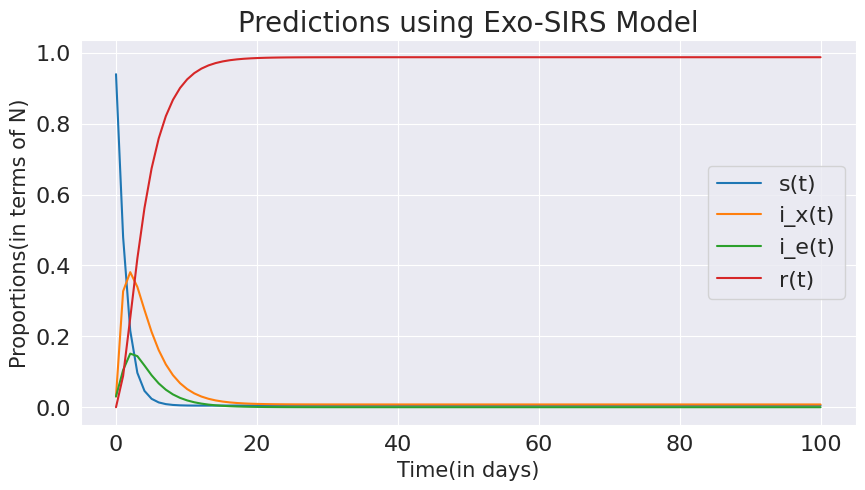

In [ ]:
# Plotting the result

plt.figure(figsize = (10,5))
plt.plot(t, solution1[:,0], label = 's(t)')
plt.plot(t, solution1[:,1], label = 'i_x(t)')
plt.plot(t, solution1[:,2], label = 'i_e(t)')
plt.plot(t, solution1[:,3], label = 'r(t)')
# plt.plot(t, spread['s'], label = 's(t) actual')
# plt.plot(t, spread['Daily exo infected']/N, label = 'i_x(t) actual')
# plt.plot(t, spread['Daily endo infected']/N, label = 'i_e(t) actual')
# plt.plot(t, spread['Daily recovered']/N, label = 'r(t) actual')

plt.legend(prop={'size': 16})
plt.title("Predictions using Exo-SIRS Model", size=20)
plt.xlabel("Time(in days)", size=15)
plt.ylabel("Proportions(in terms of N)", size=15)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()
# solution1[:,1]

In [ ]:
last= spread.shape[0] -1

S0 = spread.loc[0,'s']
IX0 = spread.loc[0,'I_X_active']/N
IE0 = spread.loc[0,'I_E_active']/N
R0 = spread.loc[0,'r']
beta_x = beta_x_mean
beta_e = beta_e_mean
gamma = gamma_mean
eta = eta_mean

# time vector
t = np.linspace(0, 550, 550)


# Result
solution1 = scipy.integrate.odeint(Exo_SIRS_model2,[S0, IX0, IE0, R0], t, args=(beta_x, beta_e, gamma, eta))
solution1 = np.array(solution1)
print(S0)
print(IX0)
print(IE0)
print(R0)

0.9393939393939394
0.030303030303030304
0.030303030303030304
0.0


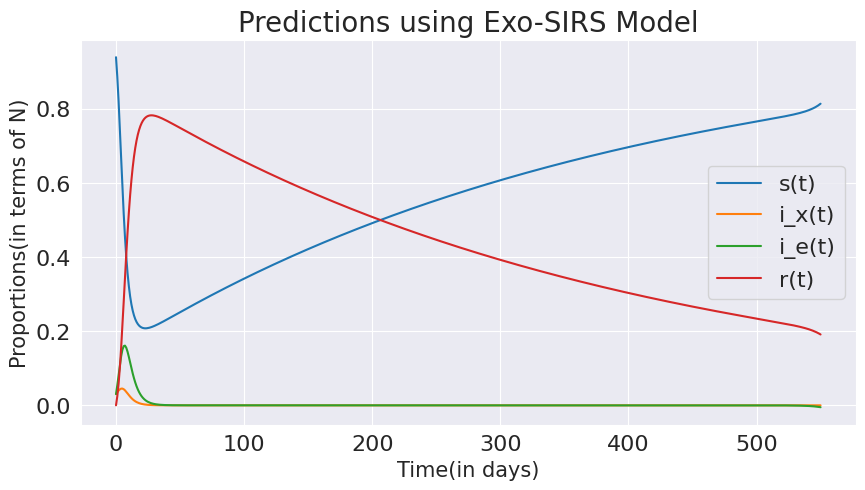

array([ 3.03030303e-02,  3.52227302e-02,  3.97046289e-02,  4.31509532e-02,
        4.50449949e-02,  4.51251330e-02,  4.34634115e-02,  4.04086071e-02,
        3.64453179e-02,  3.20539989e-02,  2.76238903e-02,  2.34237872e-02,
        1.96109205e-02,  1.62562272e-02,  1.33717911e-02,  1.09338723e-02,
        8.89978169e-03,  7.21914467e-03,  5.84082458e-03,  4.71680483e-03,
        3.80407588e-03,  3.06529437e-03,  2.46872683e-03,  1.98782215e-03,
        1.60061667e-03,  1.28909460e-03,  1.03857220e-03,  8.37138414e-04,
        6.75166120e-04,  5.44894793e-04,  4.40080860e-04,  3.55708239e-04,
        2.87750635e-04,  2.32978205e-04,  1.88800742e-04,  1.53141099e-04,
        1.24333398e-04,  1.01041139e-04,  8.21918750e-05,  6.69242885e-05,
        5.45463879e-05,  4.45018651e-05,  3.63431351e-05,  2.97097915e-05,
        2.43114784e-05,  1.99139082e-05,  1.63282171e-05,  1.34016880e-05,
        1.10107738e-05,  9.05536673e-06,  7.45466829e-06,  6.14308865e-06,
        5.06731514e-06,  

In [ ]:
# Plotting the result

plt.figure(figsize = (10,5))
plt.plot(t, solution1[:,0], label = 's(t)')
plt.plot(t, solution1[:,1], label = 'i_x(t)')
plt.plot(t, solution1[:,2], label = 'i_e(t)')
plt.plot(t, solution1[:,3], label = 'r(t)')
# plt.plot(t, spread['s'], label = 's(t) actual')
# plt.plot(t, spread['Daily exo infected']/N, label = 'i_x(t) actual')
# plt.plot(t, spread['Daily endo infected']/N, label = 'i_e(t) actual')
# plt.plot(t, spread['Daily recovered']/N, label = 'r(t) actual')

plt.legend(prop={'size': 16})
plt.title("Predictions using Exo-SIRS Model", size=20)
plt.xlabel("Time(in days)", size=15)
plt.ylabel("Proportions(in terms of N)", size=15)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()
solution1[:,1]

In [ ]:
# last= spread.shape[0] -1

# S0 = spread.loc[0,'s']
# IX0 = spread.loc[0,'i_x']
# IE0 = spread.loc[0,'i_e']
# R0 = spread.loc[0,'r']
# beta_x = beta_x_mean
# beta_e = beta_e_mean
# gamma = gamma_mean
# eta = eta_mean

# # time vector
# t = np.linspace(0, 500, 500)


# # Result
# solution1 = scipy.integrate.odeint(Exo_SIRS_model3,[S0, IX0, IE0, R0], t, args=(beta_x, beta_e, gamma, eta))
# solution1 = np.array(solution1)
# print(S0)
# print(IX0)
# print(IE0)
# print(R0)
# print(eta)

In [ ]:
# # Plotting the result

# plt.figure(figsize = (10,5))
# plt.plot(t, solution1[:,0], label = 's(t)')
# plt.plot(t, solution1[:,1], label = 'i_x(t)')
# plt.plot(t, solution1[:,2], label = 'i_e(t)')
# plt.plot(t, solution1[:,3], label = 'r(t)')
# # plt.plot(t, spread['s'], label = 's(t) actual')
# # plt.plot(t, spread['Daily exo infected']/N, label = 'i_x(t) actual')
# # plt.plot(t, spread['Daily endo infected']/N, label = 'i_e(t) actual')
# # plt.plot(t, spread['Daily recovered']/N, label = 'r(t) actual')

# plt.legend(prop={'size': 16})
# plt.title("Predictions using Exo-SIRS Model", size=20)
# plt.xlabel("Time(in days)", size=15)
# plt.ylabel("Proportions(in terms of N)", size=15)
# plt.xticks(size=16)
# plt.yticks(size=16)
# plt.show()
# # solution1[:,1]

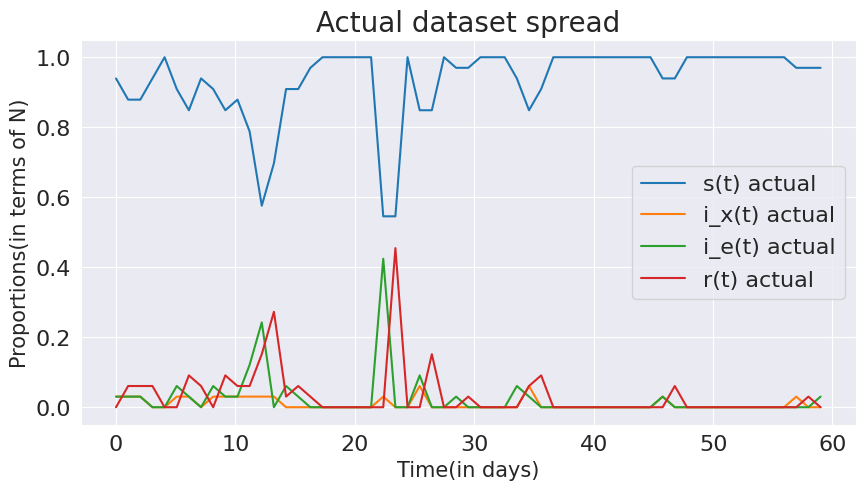

In [ ]:
# Plotting the result

plt.figure(figsize = (10,5))
t = np.linspace(0, 59, 59)

# plt.plot(t, solution1[:,0], label = 's(t)')
# plt.plot(t, solution1[:,1], label = 'i_x(t)')
# plt.plot(t, solution1[:,2], label = 'i_e(t)')
# plt.plot(t, solution1[:,3], label = 'r(t)')
plt.plot(t, spread['s'], label = 's(t) actual')
plt.plot(t, spread['I_X_active']/N, label = 'i_x(t) actual')
plt.plot(t, spread['I_E_active']/N, label = 'i_e(t) actual')
plt.plot(t, spread['Daily recovered']/N, label = 'r(t) actual')

plt.legend(prop={'size': 16})
plt.title("Actual dataset spread", size=20)
plt.xlabel("Time(in days)", size=15)
plt.ylabel("Proportions(in terms of N)", size=15)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()
# solution1[:,1]

In [ ]:
print(N)

33


In [ ]:
def Exo_SIRS_model4(y, t, beta, gamma, eta):
    s, i, r = y

    #i = i_x+i_e
    ds__dt = -beta*s*i+ eta*r
    di__dt = beta*i*s-gamma*i                          # these di__dt,dr__dt,ds__dt are having double __(underscore)...these are different variables from the ones seen in the dataframe above
    dr__dt = gamma*i - eta* r

    return([ds__dt, di__dt,  dr__dt])


In [ ]:
last= spread.shape[0] -1

S0 = spread.loc[0,'s']
IX0 = spread.loc[0,'I_X_active']/N
IE0 = spread.loc[0,'I_E_active']/N
I=IX0+IE0
R0 = spread.loc[0,'r']
beta=beta_mean
gamma = gamma_mean
eta = eta_mean

# time vector
t = np.linspace(0, 500, 500)


# Result
solution1 = scipy.integrate.odeint(Exo_SIRS_model4,[S0, I, R0], t, args=(beta, gamma, eta))
solution1 = np.array(solution1)
print(S0)
print(IX0)
print(IE0)
print(R0)
print(eta)

0.9393939393939394
0.030303030303030304
0.030303030303030304
0.0
0.0025827298831669876


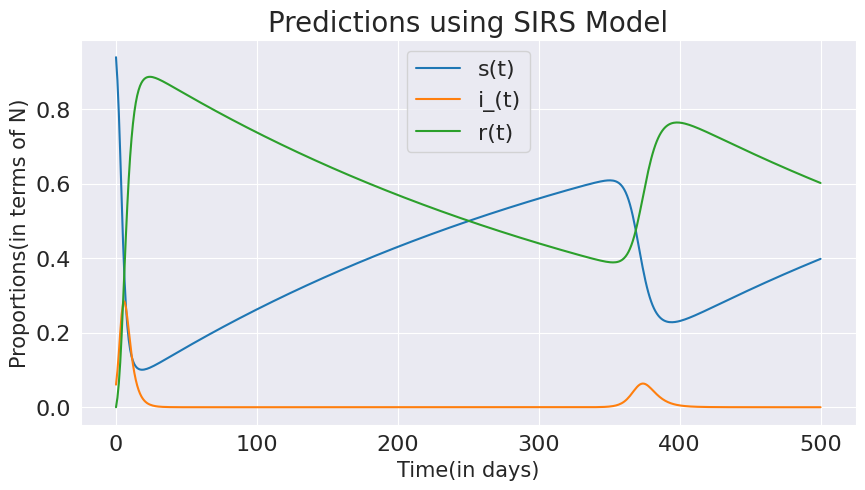

In [ ]:
# Plotting the result

plt.figure(figsize = (10,5))
plt.plot(t, solution1[:,0], label = 's(t)')
plt.plot(t, solution1[:,1], label = 'i_(t)')
plt.plot(t, solution1[:,2], label = 'r(t)')
# plt.plot(t, spread['s'], label = 's(t) actual')
# plt.plot(t, spread['Daily exo infected']/N, label = 'i_x(t) actual')
# plt.plot(t, spread['Daily endo infected']/N, label = 'i_e(t) actual')
# plt.plot(t, spread['Daily recovered']/N, label = 'r(t) actual')

plt.legend(prop={'size': 16})
plt.title("Predictions using SIRS Model", size=20)
plt.xlabel("Time(in days)", size=15)
plt.ylabel("Proportions(in terms of N)", size=15)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()
# solution1[:,1]